### Name : Tazmeen Afroz
### Roll No : 22P-9252
### Section : BAI-5A
#### Lab Task 07


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.
    Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w,b (scalar) : model parameters
    Returns
    total_cost (float): The cost of using w,b as the parameters for linear regression
    to fit the data points in x and y
    """
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [4]:
# Load the data
df = pd.read_csv('housing.csv')
print(df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
X = df['housing_median_age']
y = df['median_income']

print(X.head())
print(y.head())

0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: housing_median_age, dtype: float64
0    8.3252
1    8.3014
2    7.2574
3    5.6431
4    3.8462
Name: median_income, dtype: float64


In [6]:
X.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: housing_median_age
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [7]:
# null values check

print(X.isnull().sum())
print(y.isnull().sum())

0
0


In [8]:
# scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X.values.reshape(-1, 1))
y = scaler.fit_transform(y.values.reshape(-1, 1))

print(X[:5])

[[ 0.98214266]
 [-0.60701891]
 [ 1.85618152]
 [ 1.85618152]
 [ 1.85618152]]


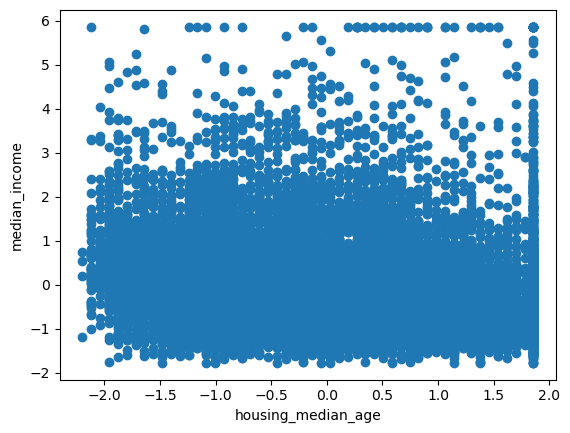

In [9]:
# plotting the data
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel('housing_median_age')
plt.ylabel('median_income')
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Linear regression model
regr = LinearRegression()
regr.fit(X_train, y_train)

# Make predictions
y_pred = regr.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)

In [12]:

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.9538407229513474


In [13]:

# Calculate custom cost
w = regr.coef_[0]
b = regr.intercept_
custom_cost = compute_cost(X_test.flatten(), y_test, w, b)
print(f"Custom Cost: {custom_cost}")

Custom Cost: 0.47692036147567546


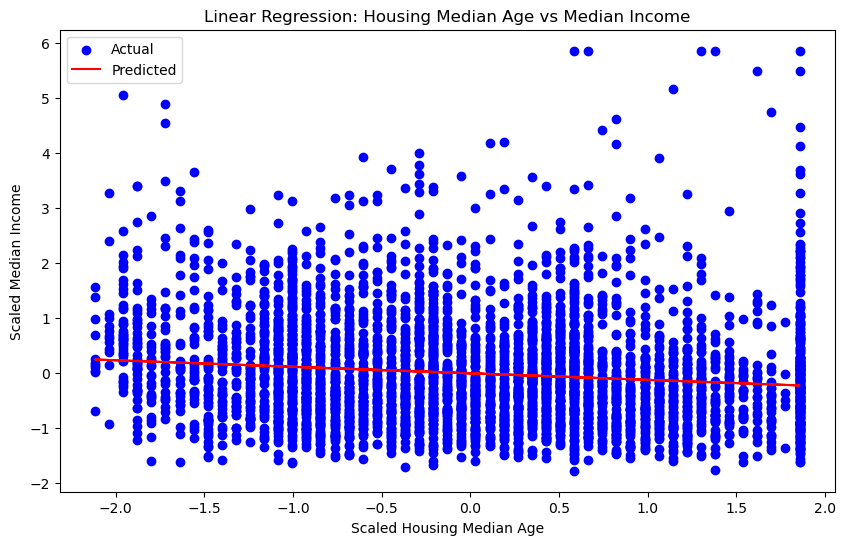

In [14]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Scaled Housing Median Age')
plt.ylabel('Scaled Median Income')
plt.title('Linear Regression: Housing Median Age vs Median Income')
plt.legend()
plt.show()